In [71]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [31]:
df = pd.read_csv('data/attacks.csv',encoding = "ISO-8859-1")
sharks=pd.DataFrame(df)
sharks.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1859,2002.05.22.a,22-May-2002,2002.0,Unprovoked,USA,Florida,"Atlantic Avenue, Palm Beach County",Playing in the surf with his 2 dogs,Sean Oliver,M,...,NaN,"Palm Beach Post, 5/24 & 26/2002",2002.05.22.a-Oliver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.05.22.a,2002.05.22.a,4444.0,NaN,NaN
1688,2004.03.27.a,27-Mar-2004,2004.0,Unprovoked,USA,Florida,"Sanibel Island, Lee County",Swimming,Peter G. Hoffman,M,...,NaN,"T. Jerome, GSAF",2004.03.27.a-Hoffman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.03.27.a,2004.03.27.a,4615.0,NaN,NaN
22653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8225,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5977,1861.03.00,Mar-1861,1861.0,Unprovoked,NEW ZEALAND,North Island,"Wynyard Wharf, Auckland Harbor",Bathing,a soldier,M,...,NaN,P. Tichener,1861.03.00-soldier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1861.03.00,1861.03.00,326.0,NaN,NaN
22372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5655,1894.07.15.R,Reportd 15-Jul-1894,1894.0,Unprovoked,FRANCE,Provence,"la Badine, Hyères",Fishing,"la Badine, Hyères,",M,...,1.8 m shark,"C. Moore, GSAF",1894.07.15.R-France.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1894.07.15.R,1894.07.15.R,648.0,NaN,NaN
4776,1940.00.00.f,Ca. 1940,1940.0,Boating,SLOVENIA,Adriatic Sea,Koper,Boating,NaN,NaN,...,White shark,A. De Maddalena; M. Zuffa (pers. Comm.),1940.00.00.f-boat-Slovenia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.f,1940.00.00.f,1527.0,NaN,NaN


In [14]:
sharks.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [18]:
#Eliminamos las columnas de Unnamed porque no nos aportan nada de información
sharks.drop(['Unnamed: 22','Unnamed: 23'],axis=1, inplace=True)

In [19]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [38]:
exploratory = sharks['Case Number'].dropna()
exploratory.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., 'ND.0001', '0',
       'xx'], dtype=object)

In [42]:
sharks['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [47]:
fatal = sharks.groupby('Fatal (Y/N)').count()
fatal

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,5,6,7,...,5,7,7,7,7,7,7,7,0,0
2017,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
M,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
N,4292,4293,4293,4292,4274,4087,4018,4018,4227,3945,...,2497,4282,4293,4293,4293,4293,4293,4293,1,2
N,1,1,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,1,1,0,0
UNKNOWN,71,71,71,71,69,64,60,36,63,40,...,17,70,71,71,71,71,71,71,0,0
Y,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,...,427,1388,1388,1387,1388,1388,1388,1388,0,0
y,1,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0


In [65]:
species = sharks.groupby('Species ').count()
species.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Species,,,,,,,,,,,,,,,,,,,,,
"""black tipped"" shark",1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
3' shark,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,0
3 m to 4.5 m [10' to 15'] white shark,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
"White shark, 18 mm tooth fragment recovered from the hull",1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
5.5 m [18'] shark,4,4,4,4,4,4,4,4,4,3,...,1,4,4,4,4,4,4,4,0,0
"Nurse shark, 3'",1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
1.2 m [4'] dusky shark,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2.2 m shark,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
"Alleged to involve a white shark ""with little yellow eyes""",1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0


In [79]:
Activity = sharks.groupby('Activity').count()
Activity

,Case Number,Date,Year,Type,Country,Area,Location,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Activity,,,,,,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
a canoe was pursuing a schooner that had forcibily abducted 5 young girls,1,1,1,1,1,0,0,0,1,0,...,0,1,1,1,1,1,1,1,0,0
"""Boat accident""",1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
"""Climbing up to ship after repairing the stern in water""",1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover,1,1,1,1,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,0,0
small boat,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,0
wreck of the State Oil Company ship Permina,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,0,0


<AxesSubplot:xlabel='Year', ylabel='Count'>

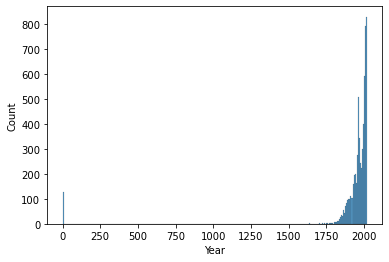

In [76]:
sns.histplot(x='Year',data=sharks)

In [80]:
injury=sharks.groupby('Injury').count()
injury

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Injury,,,,,,,,,,,,,,,,,,,,,
"""Struck across loins"" but no injury. According to witnesses, incident involved a bottlenose dolphin.",1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2 of the 5 fishermen were so seriously injured they died of their wounds,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
"3 fingers & thigh lacerated, foot crushed",1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
"3 unidentified bodies recovered (male, female & young girl) from gut of female 4.5 m [14'9""] white shark caught in fishing net. They may have drowned in tidal wave following earthquake",1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,0
"55 perished, some were taken by sharks",1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
remains of one of the crew found in shark,1,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
"sharks rammed boats, no injury to occupants",1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,0
small laceration to wrist,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [81]:
tipe = sharks.groupby('Type').count()
tipe

,Case Number,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Type,,,,,,,,,,,,,,,,,,,,,
Boat,137,137,137,137,128,130,116,136,31,8,...,112,137,137,137,137,137,137,137,0,0
Boating,203,203,203,202,187,190,180,190,102,38,...,136,203,203,203,203,203,203,203,0,0
Boatomg,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
Invalid,547,547,546,542,500,494,425,492,473,238,...,526,543,547,547,547,547,547,547,0,0
Provoked,573,574,574,571,540,527,539,565,517,280,...,412,574,574,574,574,574,574,574,0,1
Questionable,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,0,0
Sea Disaster,239,239,239,231,172,167,228,184,174,43,...,35,239,239,239,239,239,239,239,0,0
Unprovoked,4595,4595,4594,4562,4315,4248,4263,4518,4433,2863,...,2241,4583,4595,4594,4595,4595,4595,4595,1,1


In [83]:
sharks.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
16643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
